In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

# Data from https://www.cdc.gov/growthcharts/zscore.htm
dfw = pd.read_csv('https://www.cdc.gov/growthcharts/data/zscore/zwtage.csv')
dfwf = dfw.loc[dfw['Sex']=='2']; 
dfwm = dfw.loc[dfw['Sex']=='1']
# convert to years
ages = dfwf['Agemos'].values; 
agesYearsAll = [float(age)/12 for age in ages]
# yearly data
agesYears = agesYearsAll[0:-1:24];  
weightsF = np.array(dfwf['0'].values)[0:-1:24]*2.2
weightsM = np.array(dfwm['0'].values)[0:-1:24]*2.2

def setupFig(xvals,dataObj,ymin=None):
    yvals = np.array(list(dataObj.values())).flatten()
    step = 20;
    fig, ax = plt.subplots();
    fig.set_size_inches(9,6)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black',alpha=.7,axis='both')
    ax.minorticks_on()
    ax.set_xticks((),minor=True)
    ax.set_yticks(np.arange(0,max(yvals)+1,step),minor=False)
    ax.set_yticks(np.arange(0,max(yvals)+1,step/2),minor=True)
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black',alpha=0.5,axis='y')
    ax.set_title('Weight vs Age')
    ax.set_xlabel('Age (Years)')
    ax.set_ylabel('Weight (lbs)')
    ax.set_xticks(np.arange(min(xvals),max(xvals)+1,1));
    if ymin is None:
        ymin = min(yvals);
    ax.set_ylim((ymin,max(yvals)*1.05))    
    return fig, ax;

def stemPlot(xvals,dataObj,ymin=0):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin)
    for key in dataObj:
        (markers, stemlines, baseline) = ax.stem(xvals,dataObj[key],label=key);
    plt.setp(baseline, visible=False)
    plt.setp(stemlines, 'linewidth', 4)
    plt.setp(markers, markersize = 10)
    ax.legend()


def scatterPlot(xvals,dataObj,ymin=0):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin)
    for key in dataObj:
        ax.scatter(xvals,dataObj[key],s=60,label=key);
    ax.legend()

def linePlot(xvals,dataObj,ymin=0,marker='',xync=[]):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin)
    for key in dataObj:
        ax.plot(xvals,dataObj[key],label=key,marker=marker)
    for row in xync:
        ax.scatter([row[0]],row[1],label=row[2],color=row[3],marker='o')
    ax.legend()
    

## Let's look at the average female weight versus age

### Stem plot (lollipop plot)

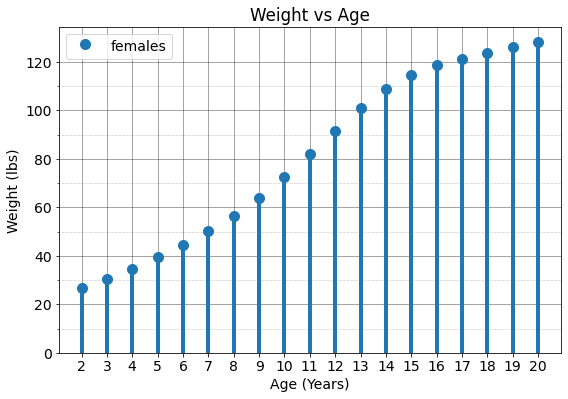

In [2]:
stemPlot(agesYears,{'females':weightsF});

<b>Q: What is the average weight of a 12 year old?</b><br><br>
<b>Q: What is the average weight of a 3 year old?</b><br><br>
<b>Q: How does this look different from the puppy's weight chart??</b><br><br>


#### Scatter Plot

This is a "scatter plot".  It's like a stem plot except the stems are missing.  

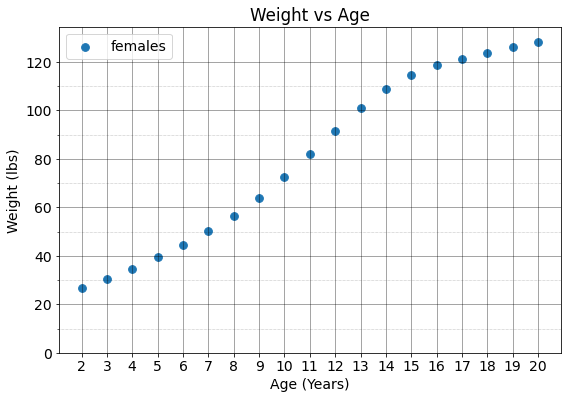

In [3]:
scatterPlot(agesYears,{'females':weightsF})

<b>Q: What is the average weight of a 5 year old?</b><br><br>
<b>Q: What is the average weight of a 8.5 year old?</b><br><br>


#### Line Plots

We can connect the dots with a line.  This is called a "line plot"

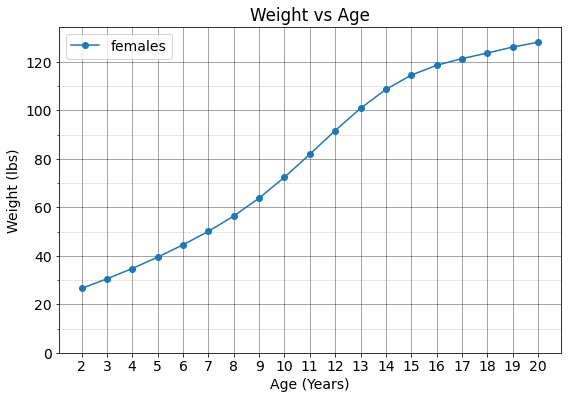

In [4]:
linePlot(agesYears,{'females':weightsF},marker='o')

Often times we will drop the dots altogether, and just show a line.

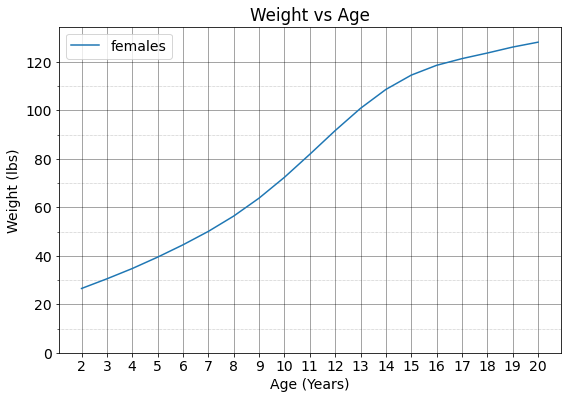

In [5]:
linePlot(agesYears,{'females':weightsF})

## Add our own ages and weights to see where you fit compared to the average

<b>Q: calulcate your age, to the nearest month</b>

In [6]:
sarahAge = 6 + 3/12;    
charlesAge = 3 + 10/12;

<b>Q: measure your weight in pounds</b>

In [7]:
sarahWeight = 51; 
charlesWeight = 33; 

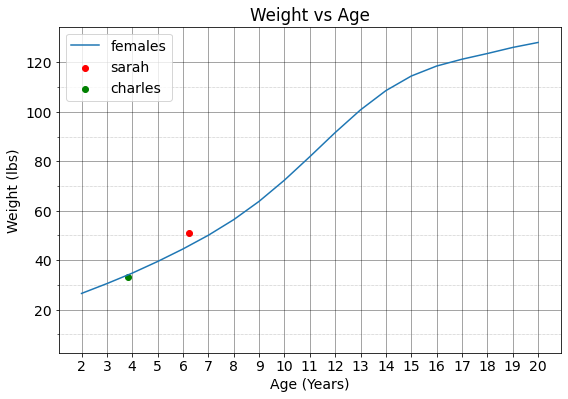

In [8]:
linePlot(agesYears,{'females':weightsF},ymin=2.5, xync = [
                 [sarahAge,sarahWeight,'sarah','r'],
                 [charlesAge,charlesWeight,'charles','g']])

<b>Q: Is Sarah heavier or lighter than average for her age?</b><br><br>
<b>Q: Is Charles heavier or lighter than average for her age?</b><br><br>
<b>Q: Who is closer to average weight for their age?</b><br><br>

### Add two more people to the line.  Make one heavier than average and one lighter than average

In [9]:
girl_max  = [12.5, 105, 'max', 'darkorchid']
girl_lily = [4.5, 27,   'lily','lime']


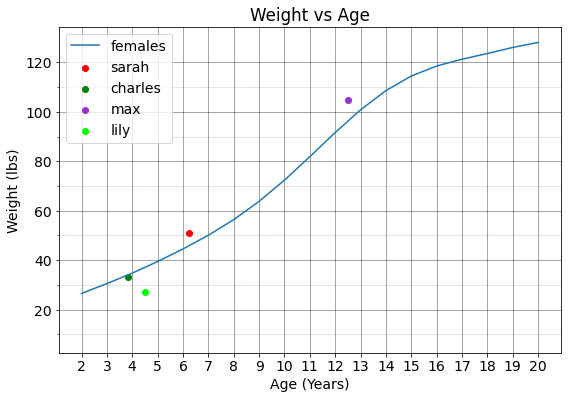

In [10]:
linePlot(agesYears,{'females':weightsF},ymin=2.5, xync = [
                 [sarahAge,sarahWeight,'sarah','r'],
                 [charlesAge,charlesWeight,'charles','g'],
                girl_max, girl_lily
])

## Comparing Male and Female Average Weights

Sometimes we want to plot multiple lines at the same time.  This makes it easy to compare data.

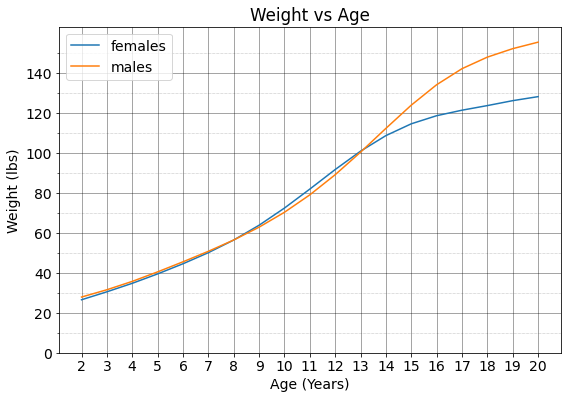

In [11]:
linePlot(agesYears,{'females':weightsF,'males':weightsM})

<b>Q: What is the average male weight at age 18</b><br><br>
<b>Q: Who weighs more at age 15?</b><br><br>
<b>Q: Who weighs more at age 2?</b><br><br>
<b>Q: At what age are females heavier than males?</b><br><br>